# Image Thresholding

For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value.

[Image Thresholding](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

## Importing

In [1]:
import cv2
import matplotlib.pyplot as plt

## Loading the Image

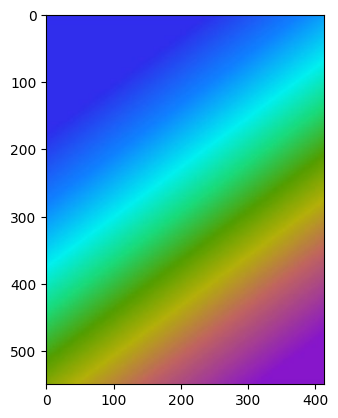

In [2]:
img = cv2.imread("../DATA/rainbow.jpg")
plt.imshow(img)

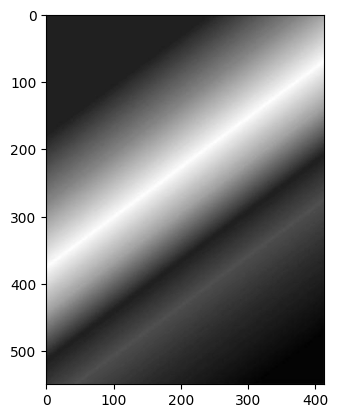

In [3]:
img = cv2.imread("../DATA/rainbow.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

## Thresholding

The function `cv.threshold` is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. 

---

`cv2.threshold(Mat src, double thresh, double maxval, int type, Mat dst=None)`

**Description:** Applies a fixed-level threshold to each array element.

**Parameters:**

`src`: Input array

`thresh`: Threshold value.

`maxval`: Maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.

`type`: Thresholding type
* `THRESH_BINARY`
* `THRESH_BINARY_INV`
* `THRESH_TRUNC`
* `THRESH_TOZERO`
* `THRESH_TOZERO_INV`
* and a few more...

`dst`: Output array of the same size and type and the same number of channels as src.

**Return Value:** Return thersh value and the thresholded image.

---

## Different Threshold Types

OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type `cv.THRESH_BINARY`.

The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

### Binary

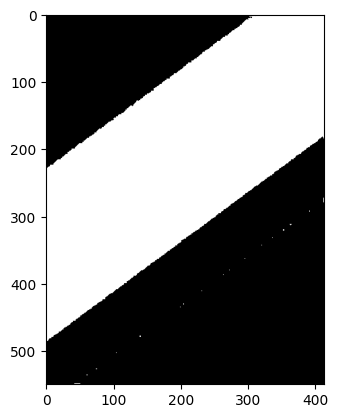

In [4]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap="gray")

### Binary Inverse

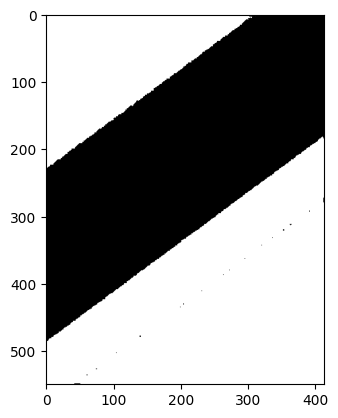

In [5]:
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap="gray")

###  Threshold Truncation

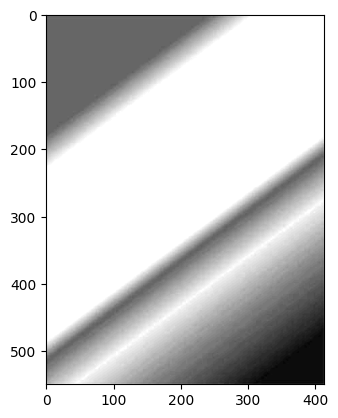

In [6]:
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
plt.imshow(thresh3, cmap="gray")

### Threshold to Zero

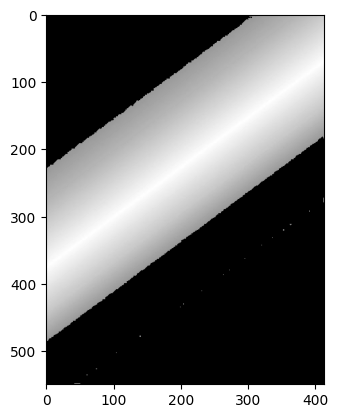

In [7]:
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
plt.imshow(thresh4, cmap="gray")

### Threshold to Zero (Inverse)

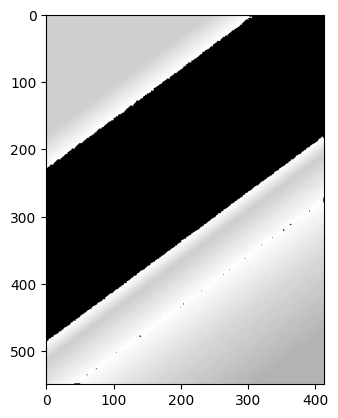

In [8]:
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh5, cmap="gray")

## Adaptive Thresholding

In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

---

`cv2.adaptiveThreshold(Mat src, double maxValue, int adaptiveMethod, int thresholdType, int blockSize, double C, Mat dst=None)`

**Description:** Applies an adaptive threshold to an array.

**Parameters:**

`src`: Source 8-bit single-channel image.

`maxValue`: Non-zero value assigned to the pixels for which the condition is satisfied

`adaptiveMethod`: Adaptive thresholding algorithm to use. 
* `ADAPTIVE_THRESH_MEAN_C`: The threshold value T(x,y) is a mean of the 𝚋𝚕𝚘𝚌𝚔𝚂𝚒𝚣𝚎×𝚋𝚕𝚘𝚌𝚔𝚂𝚒𝚣𝚎 neighborhood of (x,y) minus C
* `ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value T(x,y) is a weighted sum (cross-correlation with a Gaussian window) of the 𝚋𝚕𝚘𝚌𝚔𝚂𝚒𝚣𝚎×𝚋𝚕𝚘𝚌𝚔𝚂𝚒𝚣𝚎 neighborhood of (x,y) minus C .

`thresholdType`: Thresholding type
* `THRESH_BINARY`
* `THRESH_BINARY_INV`

`blockSize`: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.

`C`: Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.

`dst`: Destination image of the same size and the same type as src.

**Return Value:** Return the thresholded image.

---

### Create image display function

In [9]:
def show_pic(img):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

### Load the image

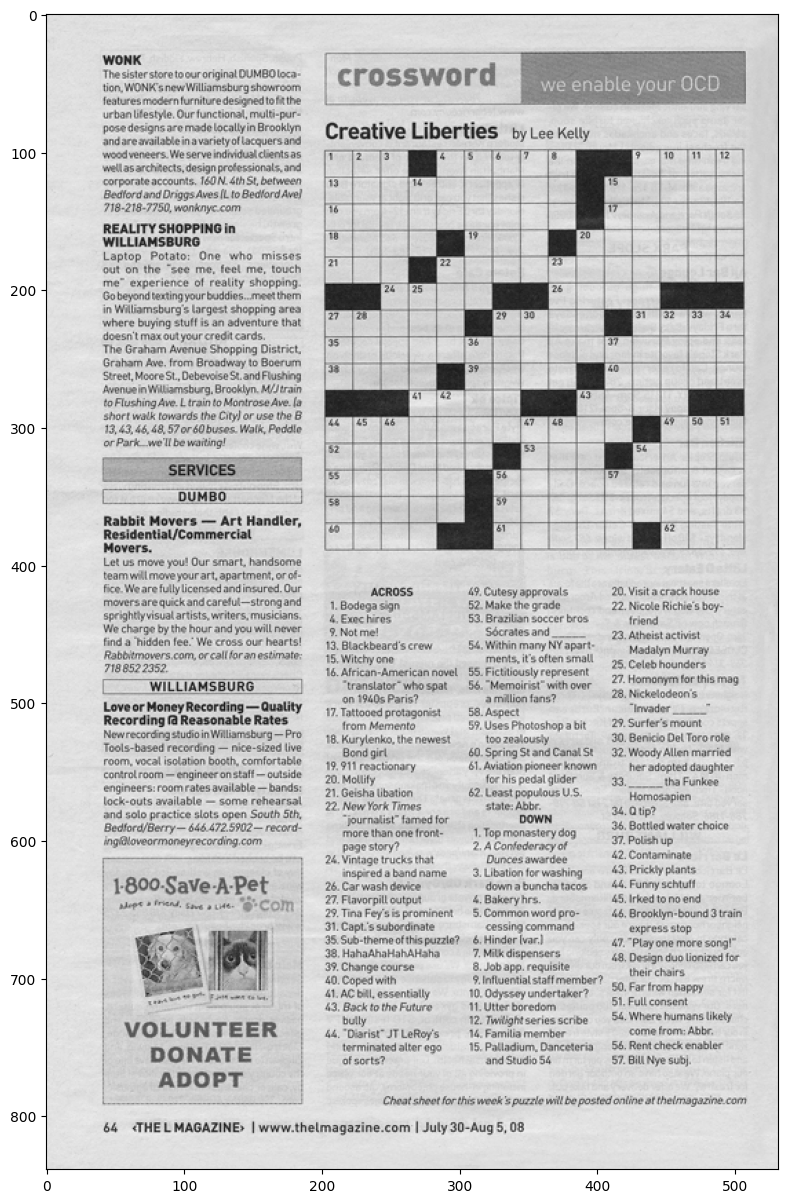

In [10]:
crossword = cv2.imread("../DATA/crossword.jpg", 0)
show_pic(crossword)

### Binary threshold

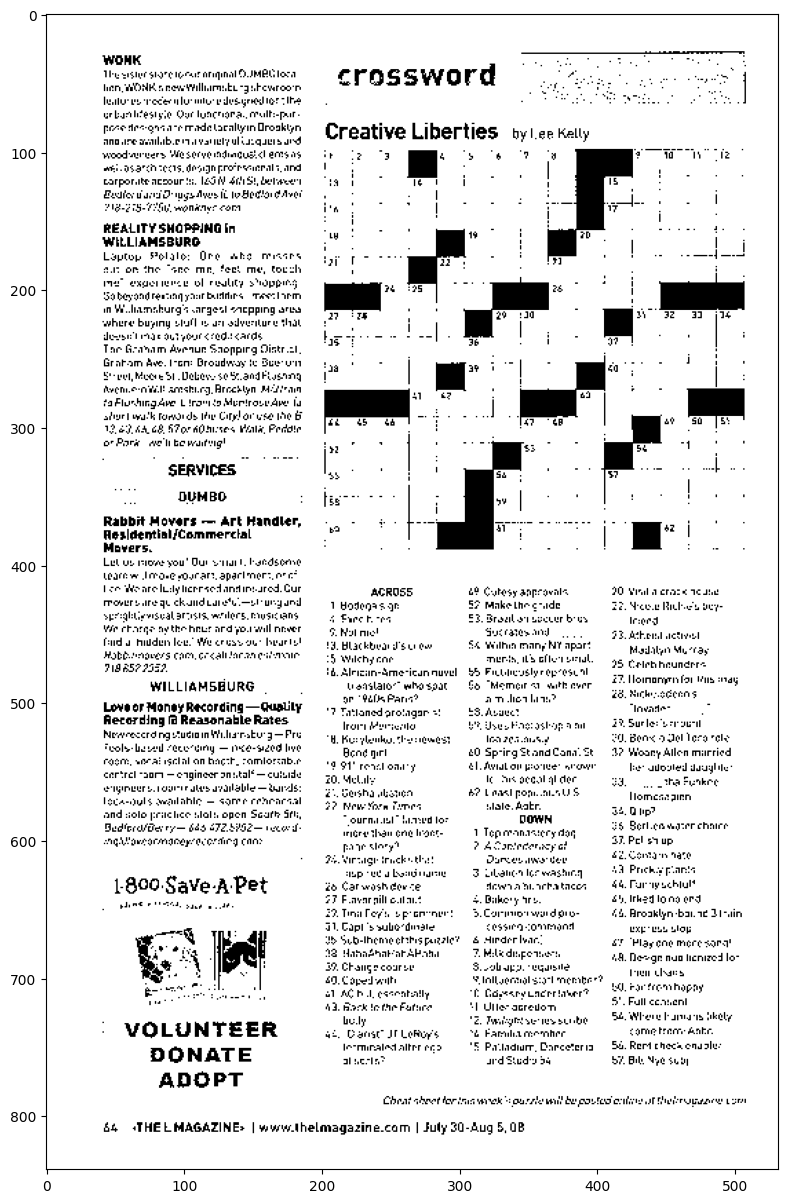

In [11]:
ret, th1 = cv2.threshold(crossword, 127, 255, cv2.THRESH_BINARY)
show_pic(th1)

### Adaptive threshold

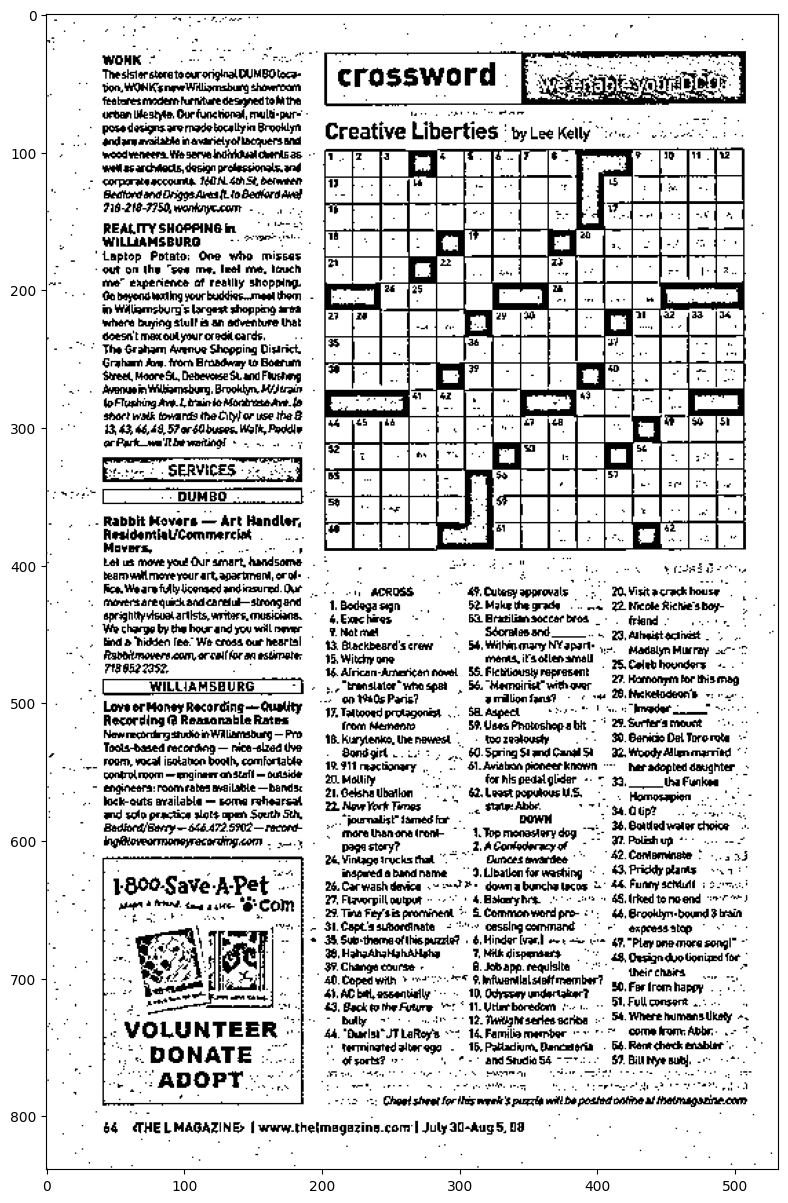

In [12]:
th2 = cv2.adaptiveThreshold(crossword, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(th2)

#### Blended

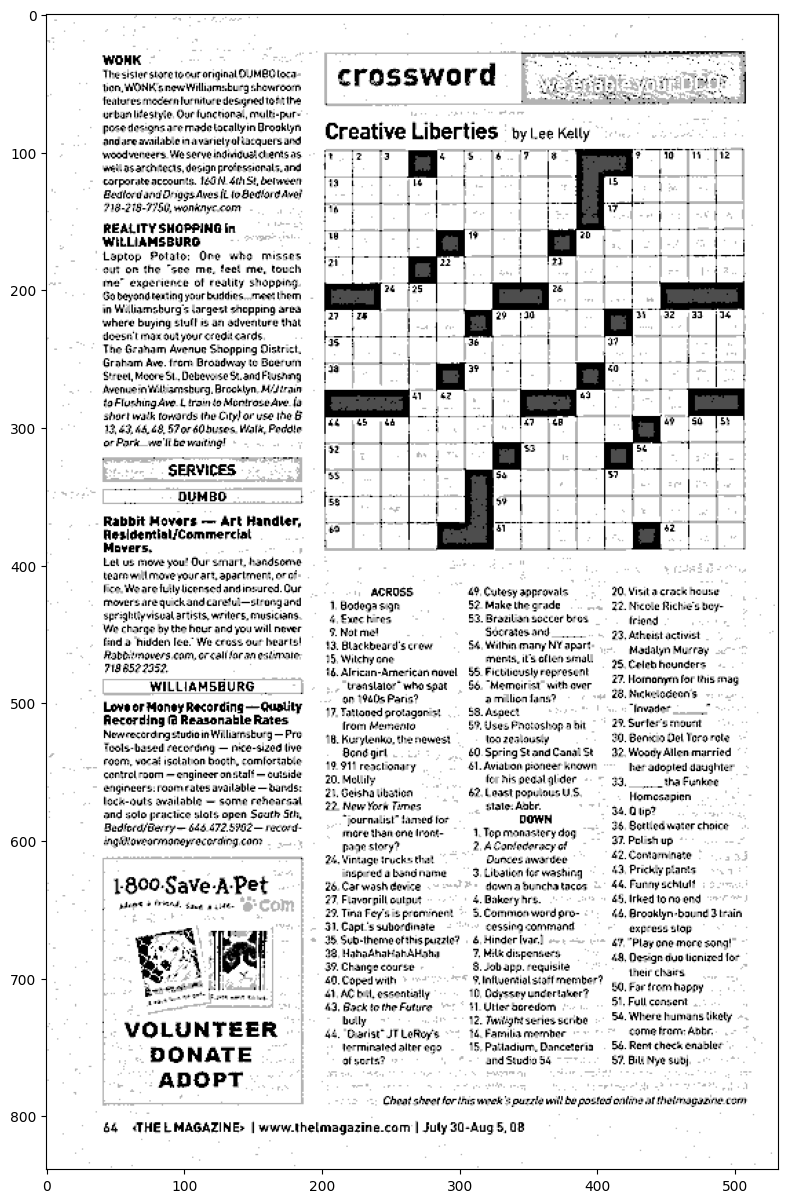

In [13]:
blended = cv2.addWeighted(src1=th1, alpha=0.7, src2=th2, beta=0.3, gamma=0)
show_pic(blended)